Corner coordinates:
Bottom-left: [-37.8234  144.95441]
Bottom-right: [-37.81559 144.97882]
Top-left: [-37.81192 144.94713]
Top-right: [-37.80406 144.97107]


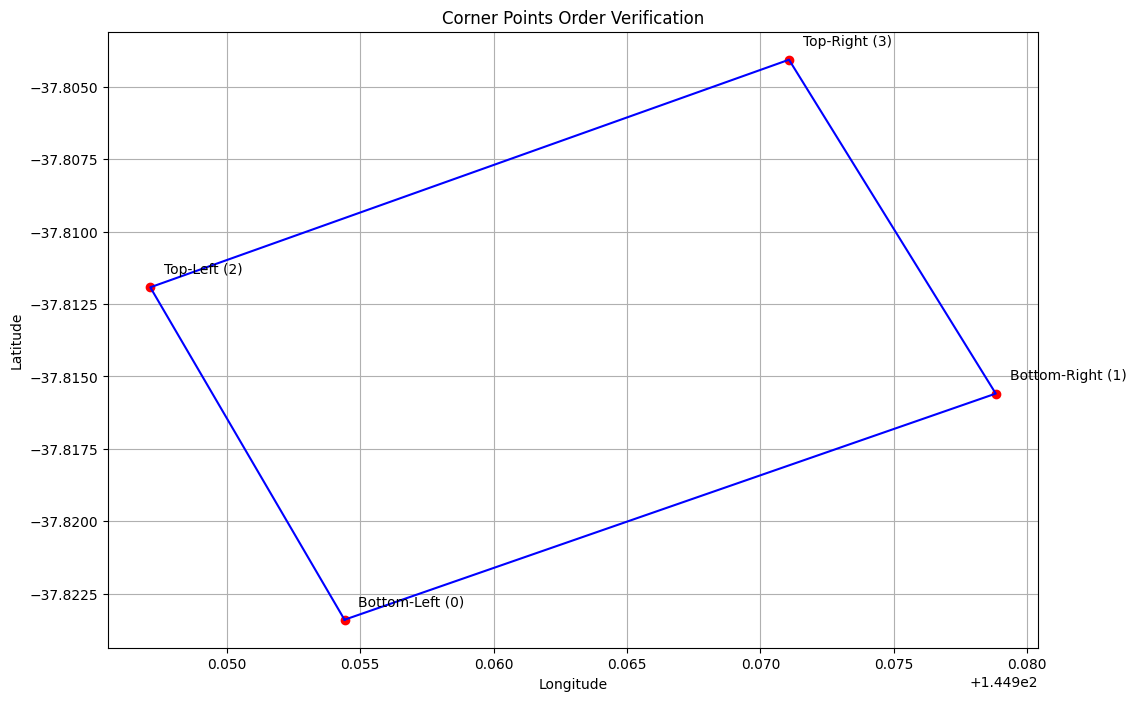

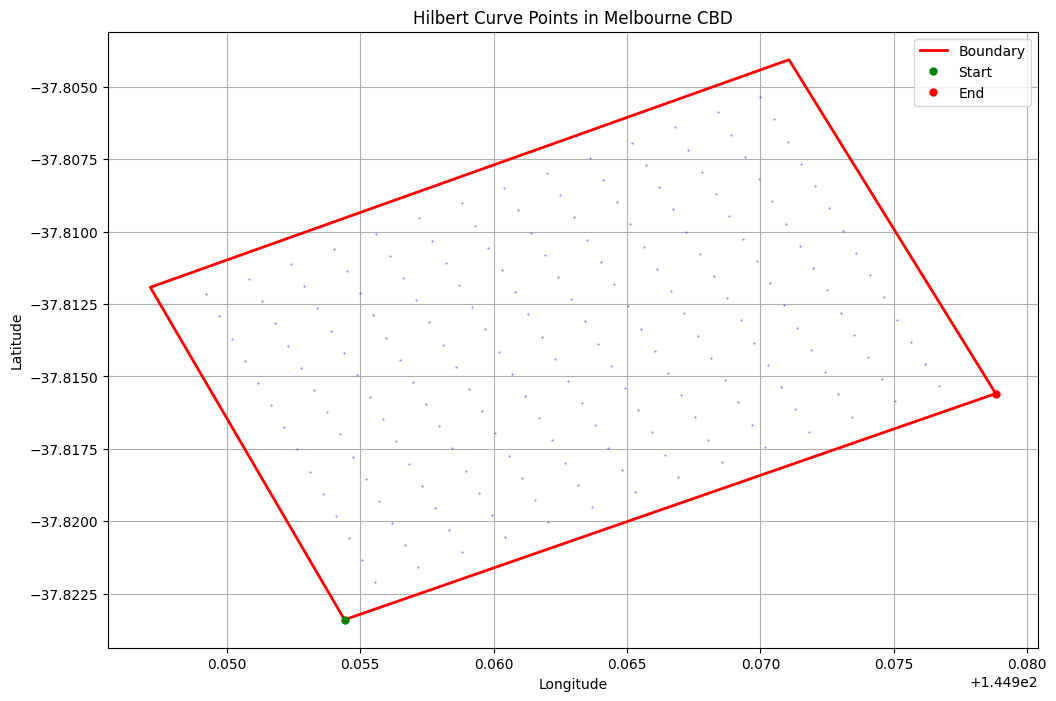

In [9]:
import numpy as np
import pandas as pd
from hilbertcurve.hilbertcurve import HilbertCurve
import matplotlib.pyplot as plt

def plot_corners_with_labels(corners):
    """Debug function to visualize corner ordering"""
    labels = ['Bottom-Left (0)', 'Bottom-Right (1)', 'Top-Left (2)', 'Top-Right (3)']
    plt.figure(figsize=(12, 8))
    for i, (corner, label) in enumerate(zip(corners, labels)):
        plt.plot(corner[1], corner[0], 'ro')
        plt.annotate(label, (corner[1], corner[0]), xytext=(10, 10), 
                    textcoords='offset points')
    
    # Connect corners in the correct order to form the rectangle
    corners_plot = np.vstack((
        corners[0],  # Bottom-left
        corners[1],  # Bottom-right
        corners[3],  # Top-right
        corners[2],  # Top-left
        corners[0]   # Back to bottom-left to close the shape
    ))
    plt.plot(corners_plot[:, 1], corners_plot[:, 0], 'b-')
    plt.title('Corner Points Order Verification')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

def transform_point(point, corners):
    """
    Transform a point from unit square coordinates to target space coordinates
    using bilinear interpolation.
    """
    x, y = point
    
    # Bottom edge interpolation
    bottom = corners[0] * (1 - x) + corners[1] * x
    # Top edge interpolation
    top = corners[2] * (1 - x) + corners[3] * x
    # Final interpolation between bottom and top
    return bottom * (1 - y) + top * y

# Define the corners of the slanted rectangle (Melbourne CBD area)
corners = np.array([
    [-37.8234, 144.95441],   # Bottom-left (0)
    [-37.81559, 144.97882],  # Bottom-right (1)
    [-37.81192, 144.94713],  # Top-left (2)
    [-37.80406, 144.97107]   # Top-right (3)
])

# First, let's verify the corner ordering
print("Corner coordinates:")
print("Bottom-left:", corners[0])
print("Bottom-right:", corners[1])
print("Top-left:", corners[2])
print("Top-right:", corners[3])

# Plot corners to verify ordering
plot_corners_with_labels(corners)

# Hilbert curve parameters
p = 4  # Number of iterations
n = 2  # Number of dimensions

# Generate Hilbert curve points
hc = HilbertCurve(p, n)
num_points = 2 ** (p * n)

# Generate and transform points
points = []
max_coordinate = 2**p - 1

for i in range(num_points):
    hilbert_point = hc.point_from_distance(i)
    normalized_point = (hilbert_point[0] / max_coordinate, hilbert_point[1] / max_coordinate)
    transformed_point = transform_point(normalized_point, corners)
    points.append(transformed_point)

# Convert first 196 points to DataFrame
df = pd.DataFrame(points[:256], columns=['Latitude', 'Longitude'])

# Plot the results
plt.figure(figsize=(12, 8))

# Plot all points
points_array = np.array(points[:256])
plt.plot(points_array[:, 1], points_array[:, 0], 'b.', markersize=1, alpha=0.5)

# Plot boundary with correct corner connections
corners_plot = np.vstack((
    corners[0],  # Bottom-left
    corners[1],  # Bottom-right
    corners[3],  # Top-right
    corners[2],  # Top-left
    corners[0]   # Back to bottom-left to close the shape
))
plt.plot(corners_plot[:, 1], corners_plot[:, 0], 'r-', linewidth=2, label='Boundary')

# Plot first and last points
plt.plot(points_array[0, 1], points_array[0, 0], 'g.', markersize=10, label='Start')
plt.plot(points_array[-1, 1], points_array[-1, 0], 'r.', markersize=10, label='End')

plt.title('Hilbert Curve Points in Melbourne CBD')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

# Save to CSV
df.to_csv('usersLocation-melbCBD_Experiments_Hilbert.csv', index_label='Index')

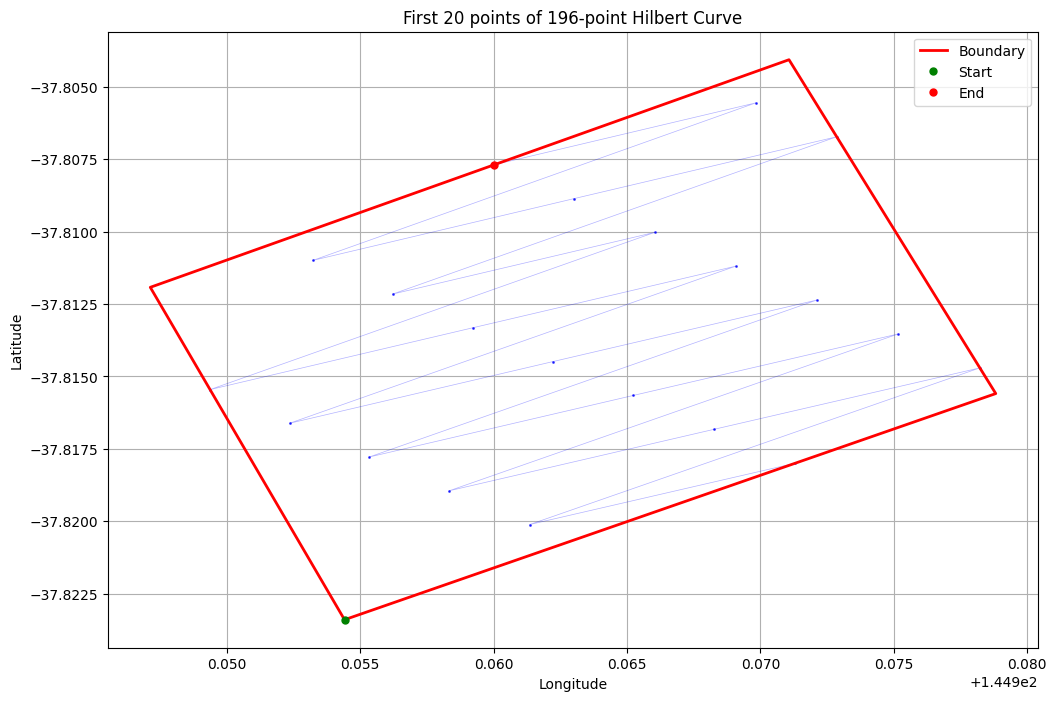

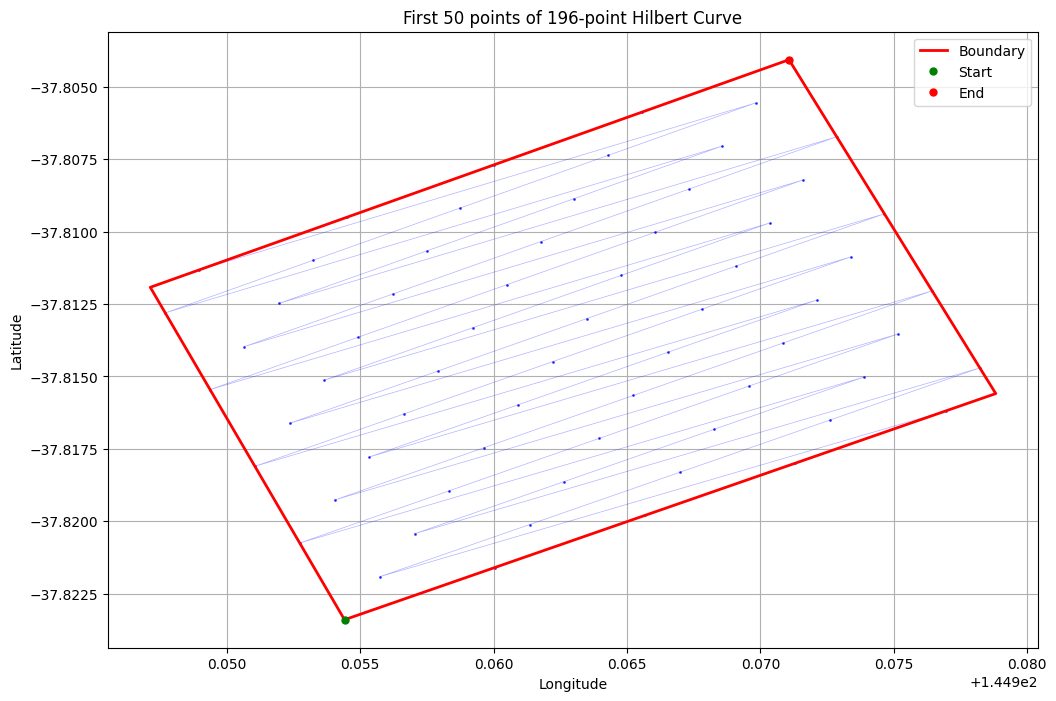

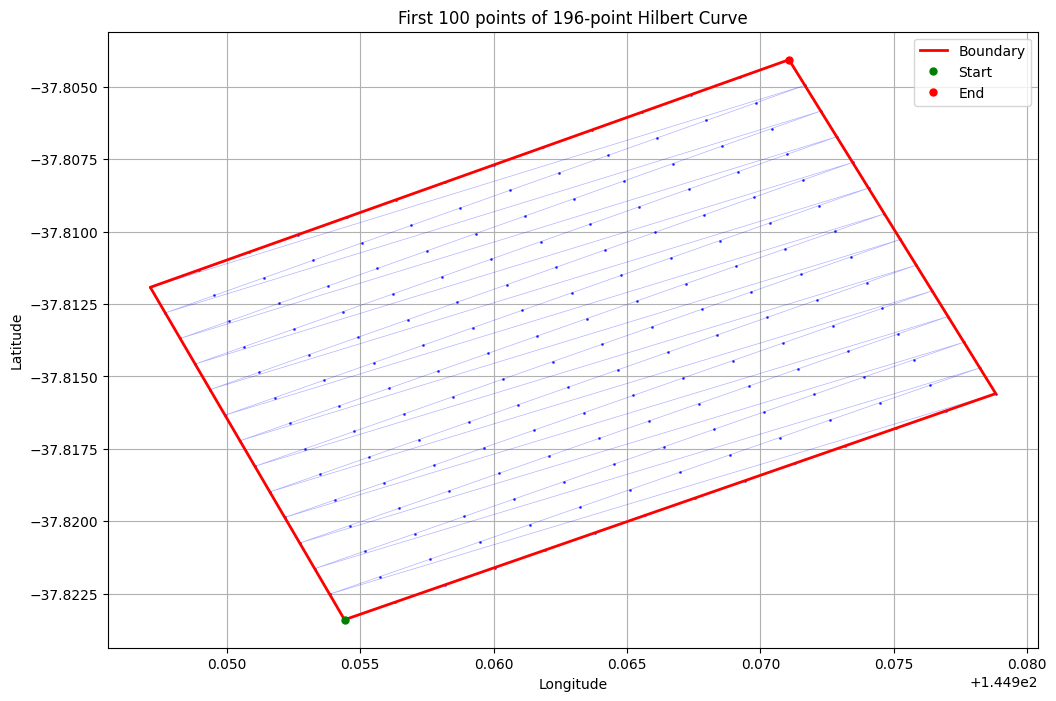

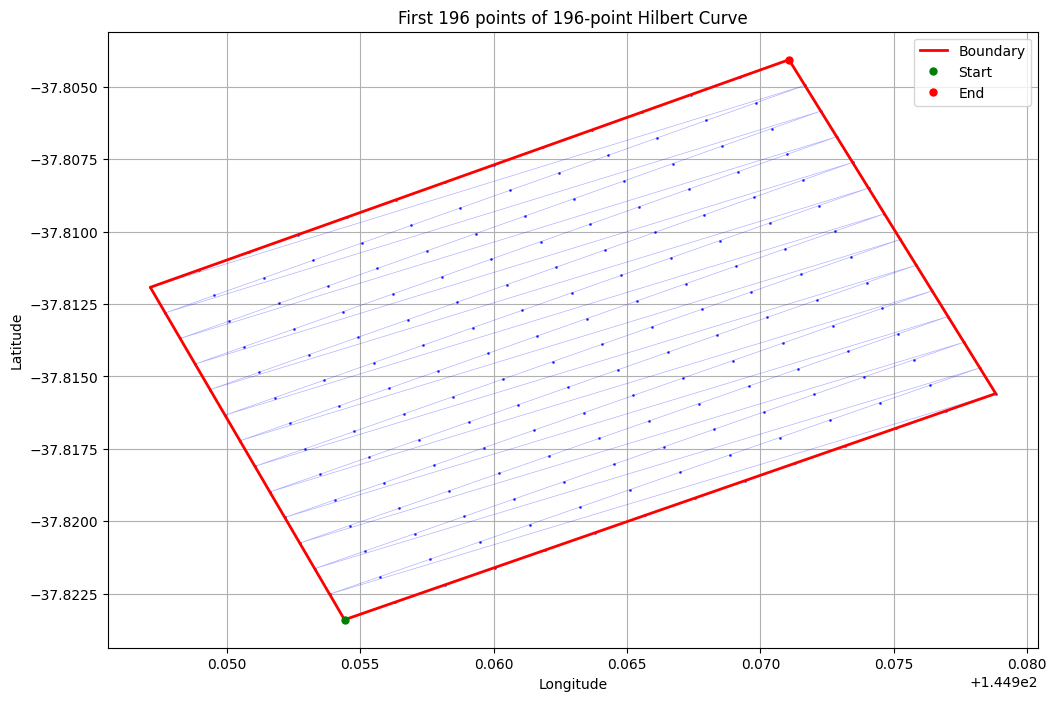

Number of points generated: 196


In [12]:
import numpy as np
import pandas as pd
from hilbertcurve.hilbertcurve import HilbertCurve
import matplotlib.pyplot as plt

# Define the corners
corners = np.array([
    [-37.8234, 144.95441],   # Bottom-left
    [-37.81559, 144.97882],  # Bottom-right
    [-37.81192, 144.94713],  # Top-left
    [-37.80406, 144.97107]   # Top-right
])


df = pd.read_csv('/home/dawn/repos/iFogSim-placement/dataset/usersLocation-melbCBD_Experiments.csv', header=None)
points_array = df[[0, 1]].to_numpy()

# Demonstrate progressive coverage with different N
test_ns = [20, 50, 100, 196]

for n in test_ns:
    stepsize = 196 // n
    plt.figure(figsize=(12, 8))
    
    subset_points = points_array[::stepsize]
    plt.plot(subset_points[:, 1], subset_points[:, 0], 'b.', markersize=2, alpha=0.7)
    
    # Connect points with lines to show the curve
    plt.plot(subset_points[:, 1], subset_points[:, 0], 'b-', linewidth=0.5, alpha=0.3)
    
    # Plot boundary
    corners_plot = np.vstack((
        corners[0],  # Bottom-left
        corners[1],  # Bottom-right
        corners[3],  # Top-right
        corners[2],  # Top-left
        corners[0]   # Back to bottom-left
    ))
    plt.plot(corners_plot[:, 1], corners_plot[:, 0], 'r-', linewidth=2, label='Boundary')
    
    # Plot first and last points of the subset
    plt.plot(subset_points[0, 1], subset_points[0, 0], 'g.', markersize=10, label='Start')
    plt.plot(subset_points[-1, 1], subset_points[-1, 0], 'r.', markersize=10, label='End')
    
    plt.title(f'First {n} points of 196-point Hilbert Curve')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Save all points to CSV
df = pd.DataFrame(points, columns=['Latitude', 'Longitude'])
df.to_csv('usersLocation-melbCBD_Experiments_Hilbert.csv', index_label='Index')

print("Number of points generated:", len(points))